In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import utils
print('TF: {}, Keras: {}'.format(tf.__version__, keras.__version__))

TF: 2.9.1, Keras: 2.9.0


In [12]:
start_time = datetime.datetime.now()
batch_size = 32
epochs = 100
num_classes = 5    #類別
img_size = 224     #圖片size
input_shape = (img_size, img_size, 3)  # we use grayscale, so only one channel
train_data = 'Vegetable_Images/train'
test_data  = 'Vegetable_Images/test'

In [13]:
# load data from directory
datagen = ImageDataGenerator(rescale=1. / 255)
gen_train = datagen.flow_from_directory(train_data,
                                        target_size=(img_size, img_size), # resize image to target size
                                        batch_size=batch_size,
                                        color_mode="rgb",  # grayscale or rgb
                                        class_mode='categorical',  # only data, no labels
                                        shuffle=True)  # keep data in same order as labels
gen_test = datagen.flow_from_directory(test_data,
                                       target_size=(img_size, img_size), # resize image to target size
                                       batch_size=batch_size,
                                       color_mode="rgb",  # grayscale or rgb
                                       class_mode='categorical',  # only data, no labels
                                       shuffle=True)  # keep data in same order as labels

Found 6000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [14]:
input_tensor = Input(shape=input_shape)
x = MobileNetV2(include_top=False, weights="imagenet")(input_tensor)  # 下載並讀入pretrain model前半的特徵萃取層
#x = MobileNetV2(include_top=False, weights=None)(input_tensor)  # 不讀入預訓練參數
x = GlobalAveragePooling2D()(x)  # 以下開始重建負責分類的區塊
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=[input_tensor], outputs=[preds])

In [15]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.8)
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=opt, metrics=['accuracy'])

In [16]:
history = model.fit(gen_train,
          epochs=epochs,
          validation_data=gen_test,
          steps_per_epoch=gen_train.samples/gen_train.batch_size,
          validation_steps=gen_test.samples/gen_test.batch_size,
          verbose=1)

Epoch 1/100
187/187 [==============================] - 108s 502ms/step - loss: 0.0804 - accuracy: 0.9773 - val_loss: 0.2912 - val_accuracy: 0.8890
Epoch 2/100
187/187 [==============================] - 91s 486ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.6877 - val_accuracy: 0.7960
Epoch 3/100
187/187 [==============================] - 92s 488ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 4/100
187/187 [==============================] - 91s 485ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.1070 - val_accuracy: 0.9580
Epoch 5/100
187/187 [==============================] - 91s 486ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0258 - val_accuracy: 0.9900
Epoch 6/100
187/187 [==============================] - 91s 486ms/step - loss: 5.1342e-04 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9950
Epoch 7/100
187/187 [==============================] - 91s 485ms/step - loss: 4.6244e-04 - accuracy: 0.9998 - val_loss:

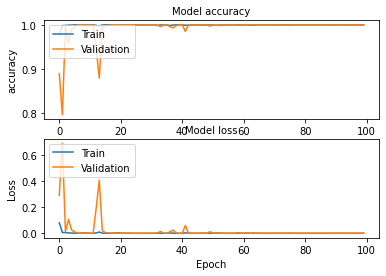

In [17]:
#plot accuracy
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=10)
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
#plot loss function
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=10)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
end_time = datetime.datetime.now()
print('Program done. Cost {} seconds.'.format((end_time-start_time).seconds))

# save as .h5 file (for tf-Keras)
model.save('C:/Users/user/Desktop/E94086149期末專題/Vegetable_Images_mobilenetv2_32.h5')

'''# save as .tflite file (for tf-Lite)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()
with open('C:/Users/user/Desktop/Vegetable_Images_mobilenetv2.tflite', 'wb') as f:
    f.write(tflite_model)'''

Program done. Cost 9140 seconds.


"# save as .tflite file (for tf-Lite)\nconverter = tf.lite.TFLiteConverter.from_keras_model(model)\nconverter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]\nconverter.target_spec.supported_types = [tf.float16]\ntflite_model = converter.convert()\nwith open('C:/Users/user/Desktop/Vegetable_Images_mobilenetv2.tflite', 'wb') as f:\n    f.write(tflite_model)"